Check reprojection errors and normal calculation

In [2]:
import cv2
import numpy as np
import os
import glob

In [3]:
print('hi')

hi


In [4]:
CHECKERBOARD = (6,8)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 

In [5]:
objpoints = []
imgpoints = [] 

In [6]:
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)

objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
print(objp.shape)
prev_img_shape = None

(1, 48, 3)


In [7]:
import os


directory = '/Users/chehakmalhotra/cva2/chessphotos'
files = os.listdir(directory)
image_files = [file for file in files if file.endswith(('.jpg', '.jpeg'))]
image_paths = [os.path.join(directory, file) for file in image_files]




In [8]:
for fname in image_paths:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
     
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
         
        imgpoints.append(corners2)
 
        # Draw and display the corners
        #img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
     
    #cv2.imshow('img',img)
    #cv2.waitKey(0)
 
#cv2.destroyAllWindows()

In [9]:
print(len(imgpoints))

25


In [10]:
h,w = img.shape[:2]

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 

In [12]:
fx = mtx[0, 0]  
fy = mtx[1, 1]  
print("Focal length:\n", "fx =", fx, "\nfy =", fy)
skew = mtx[0, 1]
print("Skew parameter:", skew)
cx = mtx[0, 2]  
cy = mtx[1, 2]  
print("Principal point):", (cx, cy))


Focal length:
 fx = 2991.2243176031193 
fy = 3000.6012208756274
Skew parameter: 0.0
Principal point): (1976.1676828886625, 1514.762272815991)


In [13]:
for i in range(len(rvecs)):
    rvec = rvecs[i]
    tvec = tvecs[i]
    
    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(rvec)
    
    print(f"Extrinsic parameters for image {i+1}:")
    print("Rotation matrix:")
    print(R)
    print("Translation vector:")
    print(tvec)
    print()

Extrinsic parameters for image 1:
Rotation matrix:
[[ 0.10325465 -0.99455217  0.01429895]
 [ 0.99016203  0.10414246  0.09345319]
 [-0.0944332   0.0045088   0.99552099]]
Translation vector:
[[ 3.08022838]
 [-3.25579771]
 [ 9.77307077]]

Extrinsic parameters for image 2:
Rotation matrix:
[[ 6.57418467e-03  9.99978311e-01  3.97385171e-04]
 [-8.65901474e-01  5.89148805e-03 -5.00179896e-01]
 [-5.00171389e-01  2.94417860e-03  8.65921425e-01]]
Translation vector:
[[-3.71795494]
 [ 3.19074481]
 [11.2505986 ]]

Extrinsic parameters for image 3:
Rotation matrix:
[[ 0.0095127  -0.99995293  0.00190776]
 [ 0.92757372  0.00811147 -0.37355214]
 [ 0.37351909  0.00532308  0.92760722]]
Translation vector:
[[ 3.5576885 ]
 [-1.33540534]
 [ 9.65038502]]

Extrinsic parameters for image 4:
Rotation matrix:
[[ 0.00173855 -0.98845408 -0.15151076]
 [ 0.99923176 -0.0042148   0.03896323]
 [-0.03915195 -0.1514621   0.98768738]]
Translation vector:
[[ 4.488038  ]
 [-2.40911331]
 [10.12883973]]

Extrinsic parameters

In [14]:
print("Radial distortion coefficients:", dist)

Radial distortion coefficients: [[ 3.01337914e-01 -1.73023034e+00  4.72778162e-05 -3.64819056e-03
   2.93455213e+00]]


In [15]:
undistorted_images = []
i=0
for raw_image in image_paths:
    if(i<5):
        raw_image = cv2.imread(raw_image)
        undistorted_image = cv2.undistort(raw_image, mtx, dist, None, mtx)
        undistorted_images.append(undistorted_image)
        i+=1

for i, undistorted_image in enumerate(undistorted_images):
    cv2.imwrite(f'undistorted_image_{i+1}.jpg', undistorted_image)

In [16]:
import numpy as np

reprojection_errors = []
for i in range(len(objpoints)):
    
    imgpoints_reproj, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = np.linalg.norm(imgpoints[i] - imgpoints_reproj) / len(imgpoints[i])
    reprojection_errors.append(error)

for i, error in enumerate(reprojection_errors):
    print(f"Reprojection error for image {i+1}: {error}")


Reprojection error for image 1: 0.18815845251083374
Reprojection error for image 2: 0.49887120723724365
Reprojection error for image 3: 1.4376713434855144
Reprojection error for image 4: 0.5919148127237955
Reprojection error for image 5: 0.2864372332890828
Reprojection error for image 6: 0.30933888753255206
Reprojection error for image 7: 0.14918930331865946
Reprojection error for image 8: 0.22535043954849243
Reprojection error for image 9: 0.1706577936808268
Reprojection error for image 10: 0.3470464547475179
Reprojection error for image 11: 0.30841777722040814
Reprojection error for image 12: 0.235300083955129
Reprojection error for image 13: 0.2022481362024943
Reprojection error for image 14: 0.16284451882044473
Reprojection error for image 15: 0.2968143622080485
Reprojection error for image 16: 0.21077015002568564
Reprojection error for image 17: 0.21432522932688394
Reprojection error for image 18: 0.3188309669494629
Reprojection error for image 19: 0.2488251527150472
Reprojection 

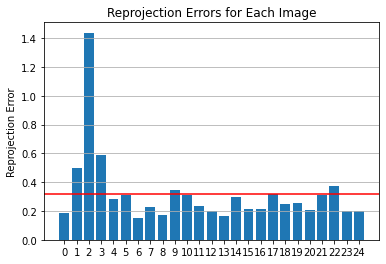

Mean Reprojection Error: 0.32
Standard Deviation of Reprojection Error: 0.25


In [32]:
import matplotlib.pyplot as plt


mean_error = np.mean(reprojection_errors)
std_error = np.std(reprojection_errors)


plt.bar(range(25), reprojection_errors)

plt.ylabel('Reprojection Error')
plt.title('Reprojection Errors for Each Image')
plt.xticks(range(25))
plt.grid(axis='y')
plt.axhline(y=mean_error, color='r', label=f'Mean Error: {mean_error:.2f}')
plt.show()

print(f"Mean Reprojection Error: {mean_error:.2f}")
print(f"Standard Deviation of Reprojection Error: {std_error:.2f}")

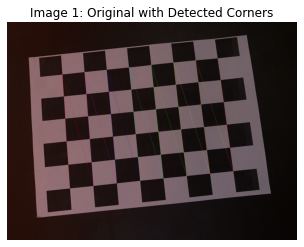

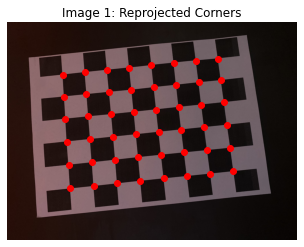

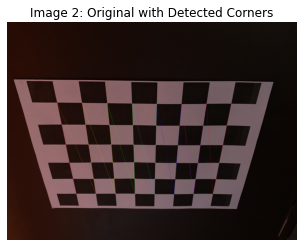

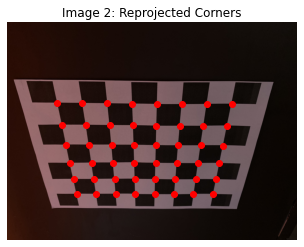

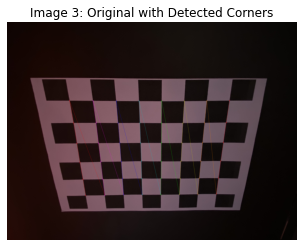

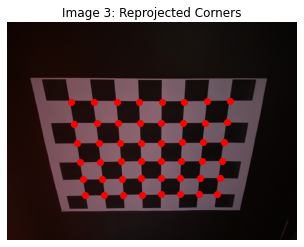

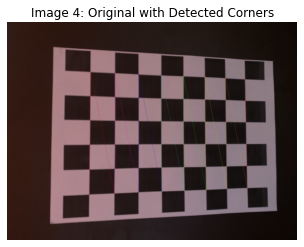

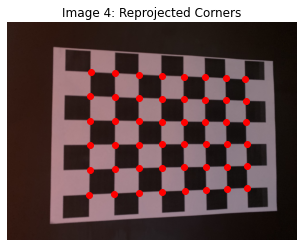

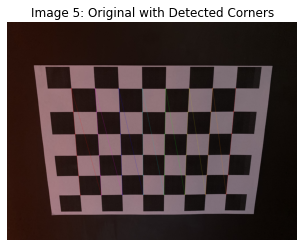

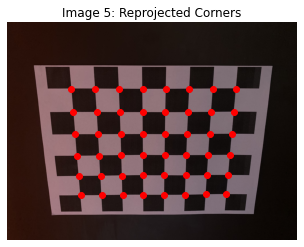

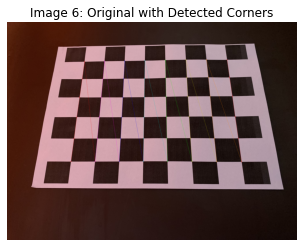

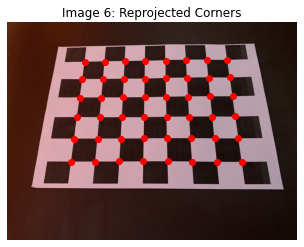

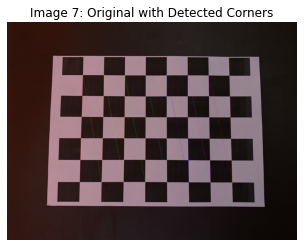

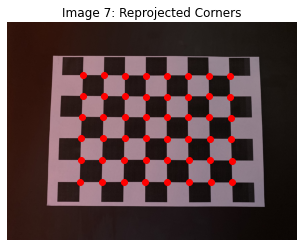

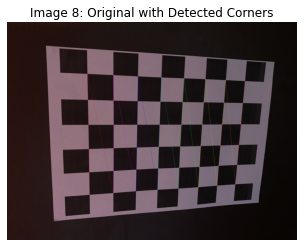

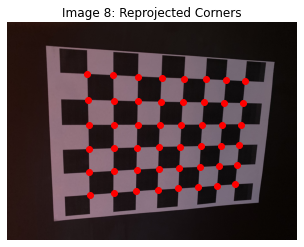

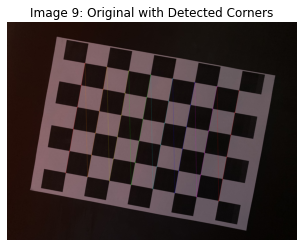

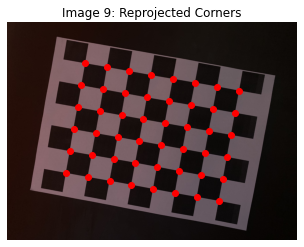

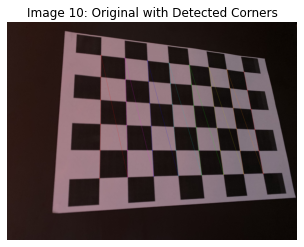

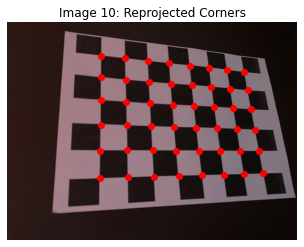

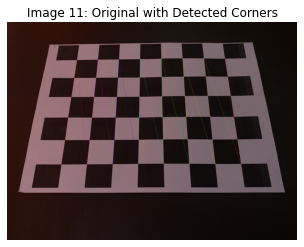

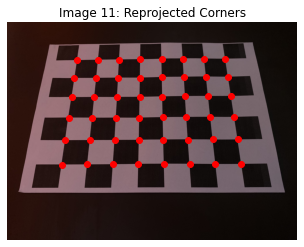

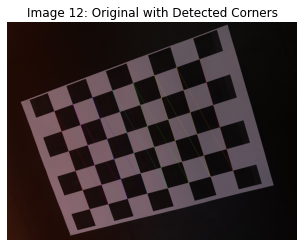

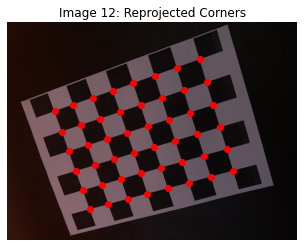

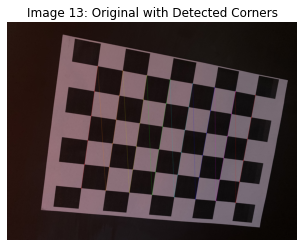

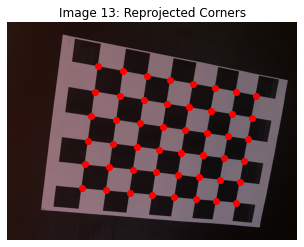

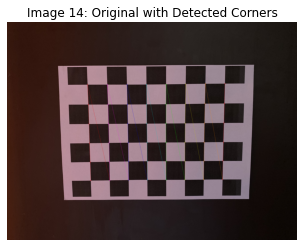

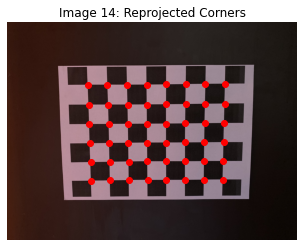

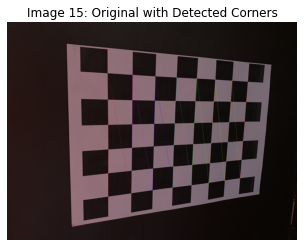

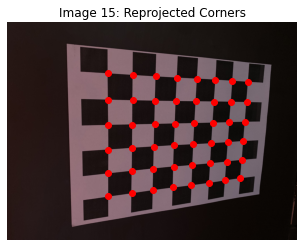

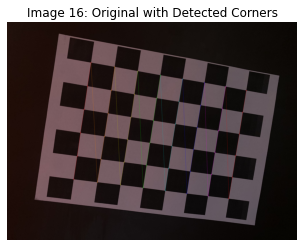

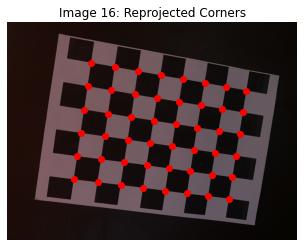

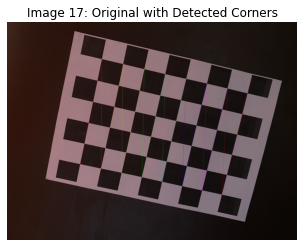

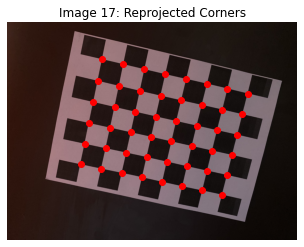

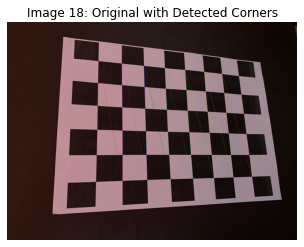

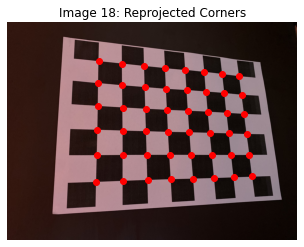

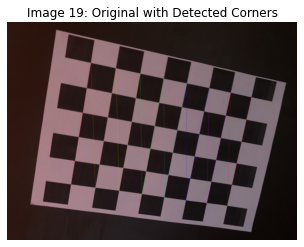

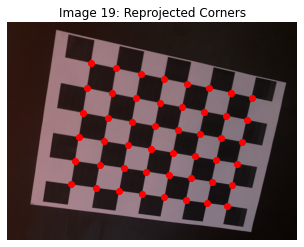

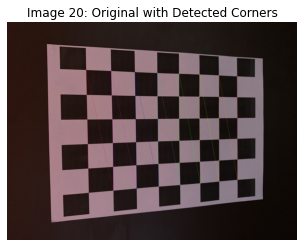

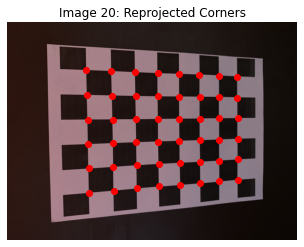

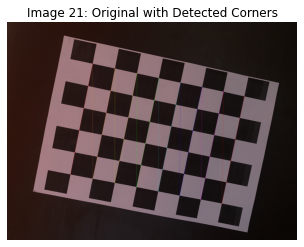

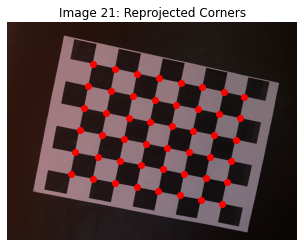

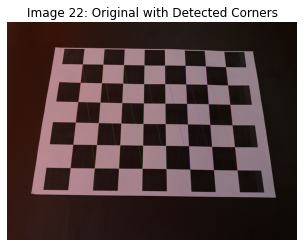

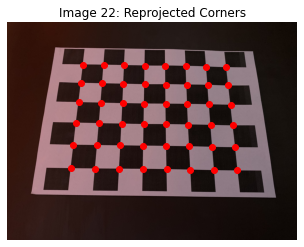

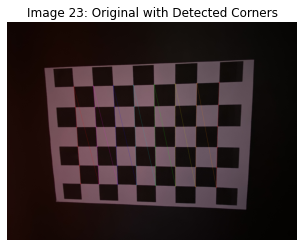

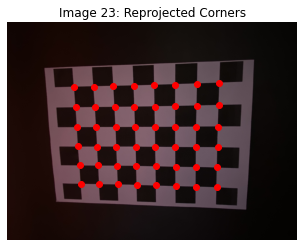

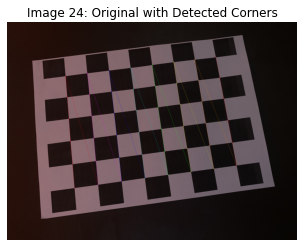

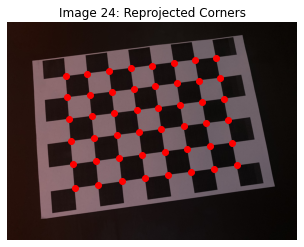

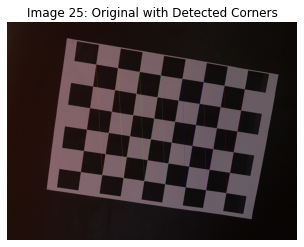

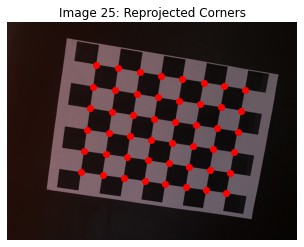

In [35]:
calibration_images = [cv2.imread(path) for path in image_paths]


for i, img in enumerate(calibration_images):
   
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    
    if ret:
        # Reproject object points onto the image plane
        imgpoints_reproj, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        
       
        img_with_corners = cv2.drawChessboardCorners(img.copy(), CHECKERBOARD, corners, ret)

        plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
        plt.title(f'Image {i+1}: Original with Detected Corners')
        plt.axis('off')
        plt.show()

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.plot(imgpoints_reproj[:, 0, 0], imgpoints_reproj[:, 0, 1], 'ro')
        plt.title(f'Image {i+1}: Reprojected Corners')
        plt.axis('off')
        plt.show()
    else:
        print("No corners detected in image")


In [19]:

plane_normals = []

for i in range(len(rvecs)):
    
    R, _ = cv2.Rodrigues(rvecs[i])
    
    normal = R[:, 2]
    plane_normals.append(normal)


plane_normals = np.array(plane_normals)


for i in range(len(plane_normals)):
    print(f"Checkerboard plane normal for image {i+1}: {plane_normals[i]}")


Checkerboard plane normal for image 1: [0.01429895 0.09345319 0.99552099]
Checkerboard plane normal for image 2: [ 3.97385171e-04 -5.00179896e-01  8.65921425e-01]
Checkerboard plane normal for image 3: [ 0.00190776 -0.37355214  0.92760722]
Checkerboard plane normal for image 4: [-0.15151076  0.03896323  0.98768738]
Checkerboard plane normal for image 5: [-0.00502425 -0.24368764  0.96984076]
Checkerboard plane normal for image 6: [0.03751986 0.34837945 0.93660238]
Checkerboard plane normal for image 7: [0.00630846 0.0804232  0.99674084]
Checkerboard plane normal for image 8: [-0.20987171 -0.16749121  0.96327595]
Checkerboard plane normal for image 9: [ 0.02178103 -0.01177989  0.99969336]
Checkerboard plane normal for image 10: [-0.2513601   0.27719921  0.92735036]
Checkerboard plane normal for image 11: [0.02122727 0.36093933 0.93234768]
Checkerboard plane normal for image 12: [ 0.13383038 -0.12613838  0.98294381]
Checkerboard plane normal for image 13: [-0.13938427 -0.09232516  0.98592

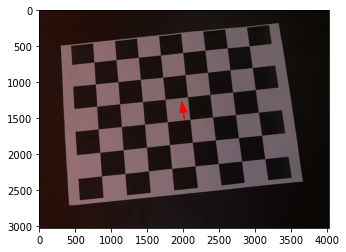

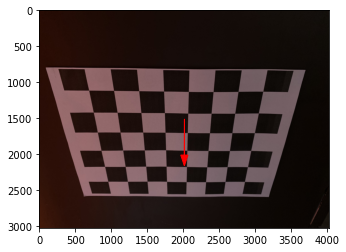

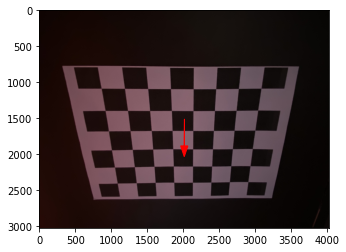

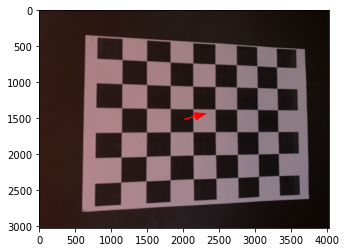

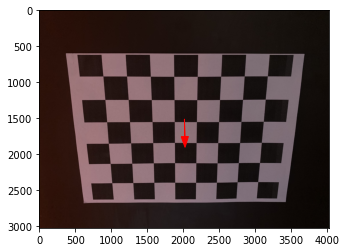

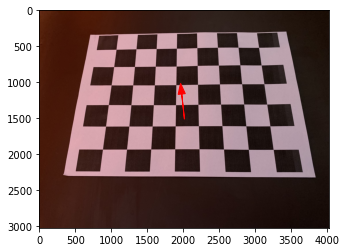

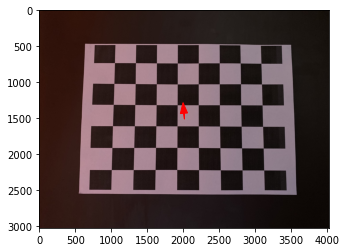

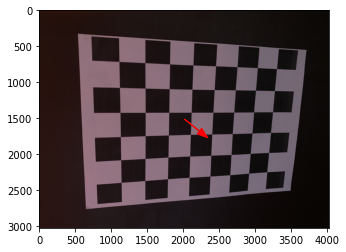

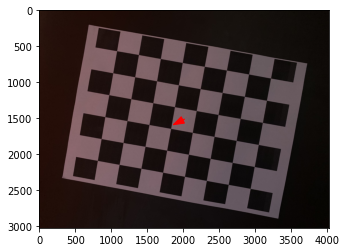

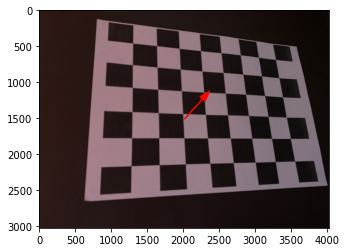

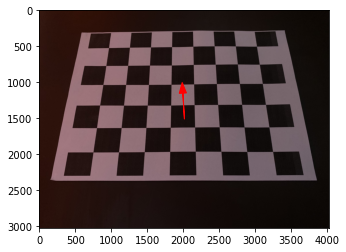

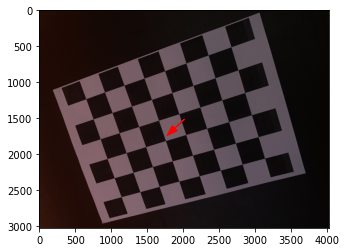

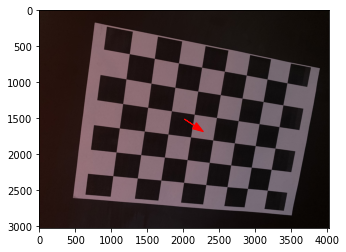

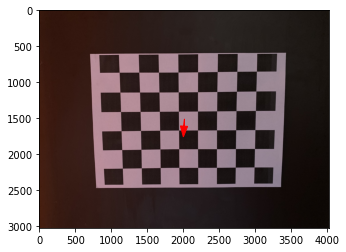

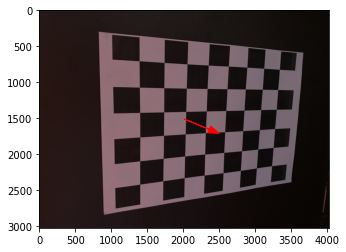

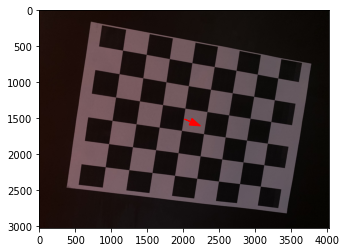

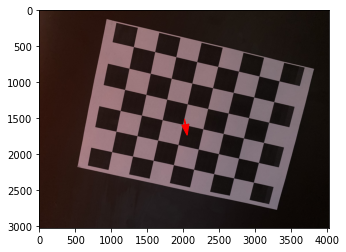

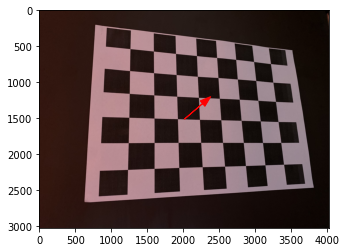

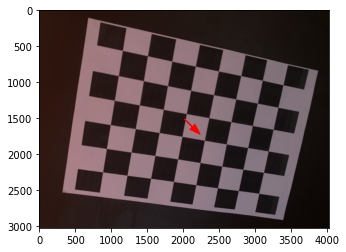

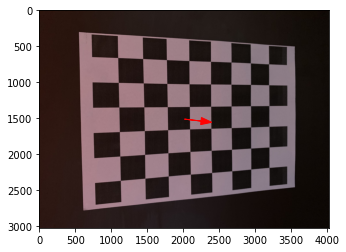

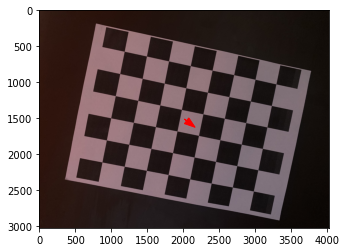

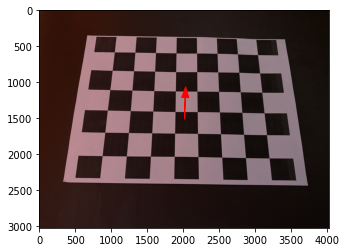

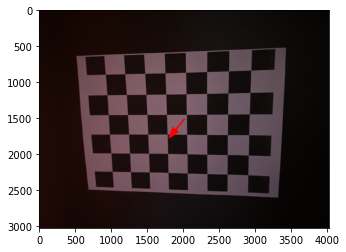

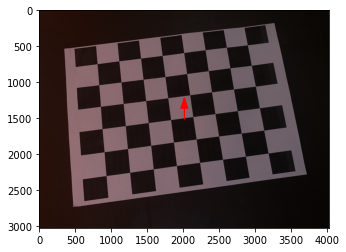

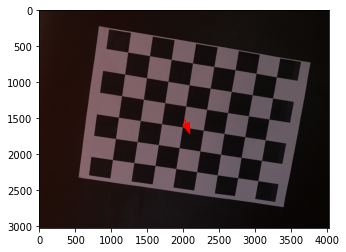

In [20]:

for i in range(len(plane_normals)):
    
    image = cv2.imread(image_paths[i])

    normal = -plane_normals[i]

    height, width, _ = image.shape
    start_point = (int(width/2), int(height/2)) 
    end_point = (int(start_point[0] + normal[0]*1000), int(start_point[1] + normal[1]*1000))  

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.arrow(start_point[0], start_point[1], end_point[0] - start_point[0], end_point[1] - start_point[1], color='red', head_width=100)
    plt.show()